In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("dataset/datasetAsus.csv")
data.head(5)

,num_processes,imagCollection,max_latency
0,15,94,153.190368
1,17,38,66.354847
2,9,57,40.233471
3,1,13,3.186560
4,9,79,60.714366


In [4]:
data.shape

(1012, 3)

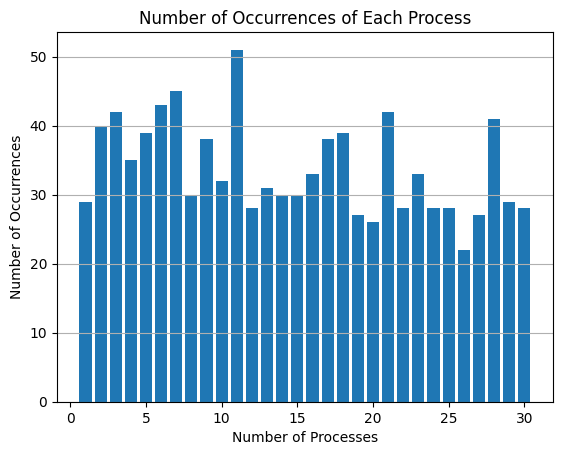

In [6]:
# Number of sample runs on each number of process
process_counts = data['num_processes'].value_counts()

# Plot
plt.bar(process_counts.index, process_counts.values)
plt.xlabel('Number of Processes')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Process')
plt.grid(axis='y')
plt.show()

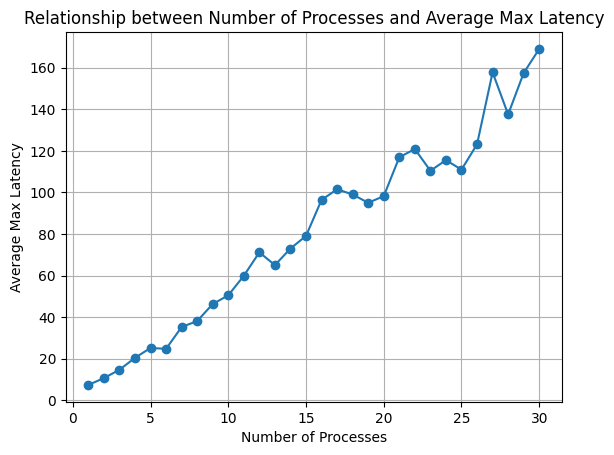

In [5]:
# Relation between number of processes and their average latency
# Group by number of processes and calculate average maximum latency
avg_latency = data.groupby('num_processes')['max_latency'].mean()

# Plot
plt.plot(avg_latency.index, avg_latency.values, marker='o')
plt.xlabel('Number of Processes')
plt.ylabel('Average Max Latency')
plt.title('Relationship between Number of Processes and Average Max Latency')
plt.grid(True)
plt.show()